In [120]:
import pickle
with open('/Users/samuelwright/Downloads/result_4_state_20251203_020236.pkl', 'rb') as f:
    data_4 = pickle.load(f)

In [121]:
import pickle
with open('/Users/samuelwright/Downloads/result_2_state_20251203_005745.pkl', 'rb') as f:
    data_2 = pickle.load(f)

In [154]:
data_2['seq']

array(['A', 'A', 'A', ..., 'A', 'A', 'A'], shape=(948066,), dtype=object)

In [13]:
import numpy as np
np.arange(1,948067)

array([     1,      2,      3, ..., 948064, 948065, 948066],
      shape=(948066,))

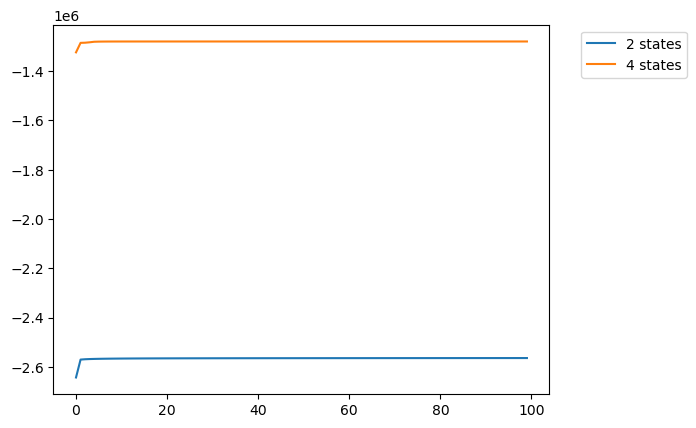

In [122]:
import matplotlib.pyplot as plt
plt.plot(data_2['log_likes'],label='2 states')
plt.plot(data_4['log_likes'],label='4 states')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


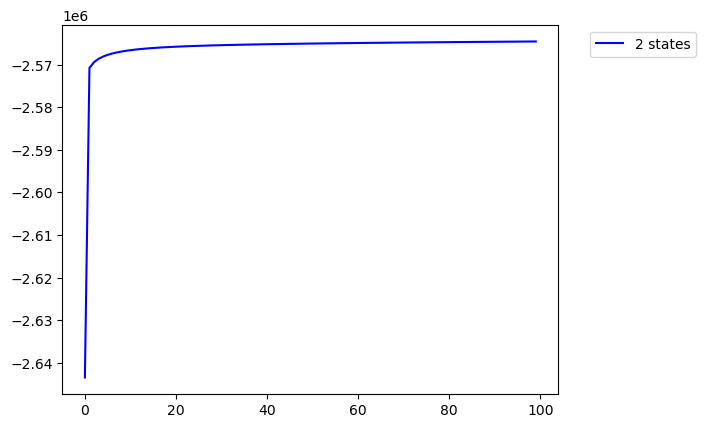

In [123]:
plt.plot(data_2['log_likes'],label='2 states',color='blue')
plt.xscale('linear')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

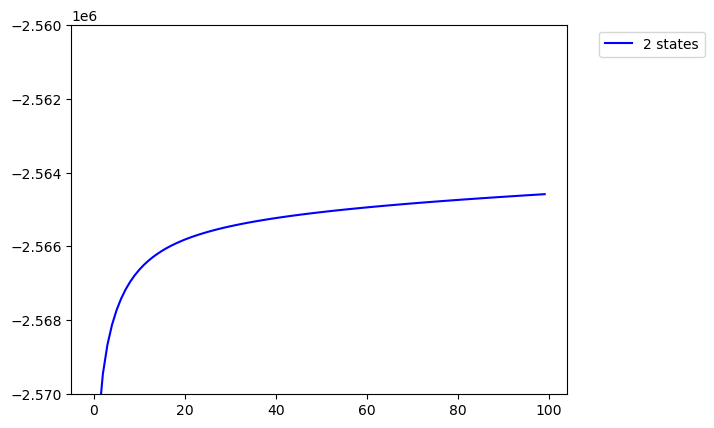

In [124]:
plt.plot(data_2['log_likes'],label='2 states',color='blue')
plt.xscale('linear')
plt.ylim(-2570000,-2560000)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

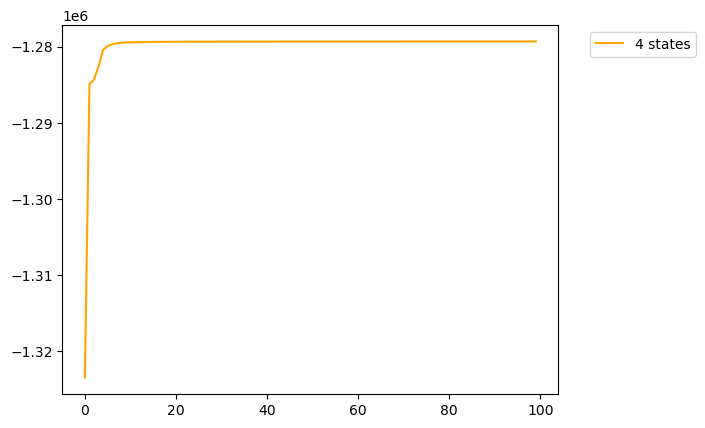

In [125]:
plt.plot(data_4['log_likes'],label='4 states',color='orange')
plt.xscale('linear')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

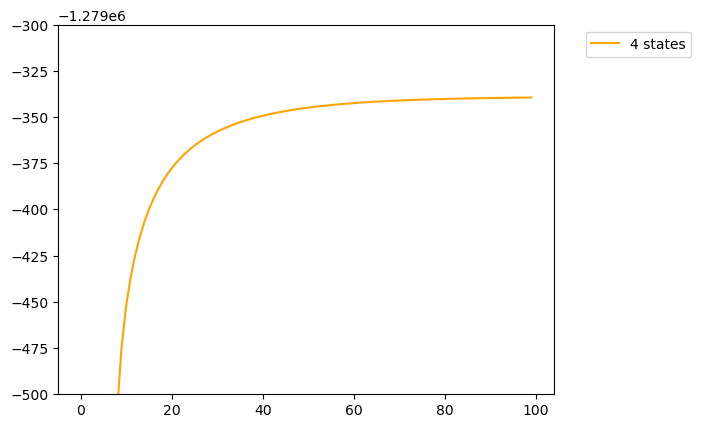

In [126]:
plt.plot(data_4['log_likes'],label='4 states',color='orange')
plt.xscale('linear')
plt.ylim(-1279500,-1279300)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

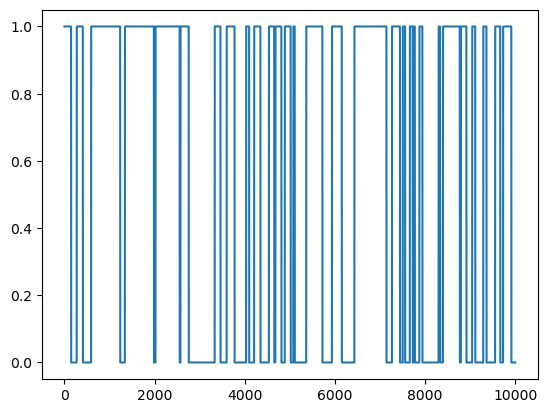

In [127]:
plt.plot(data_2['viterbi_path'][0:10000])

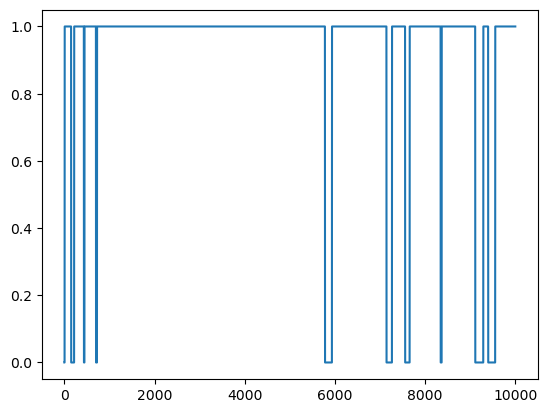

In [128]:
import pandas as pd
plt.plot(pd.Series(data_4['viterbi_path']).map({0:0,1:1,2:1,3:1})[0:10000])

In [129]:
seq_to_coding = pd.read_csv('/Users/samuelwright/Documents/CSE 250A/YeastCDSDetector-main/seq_to_coding_file.csv')

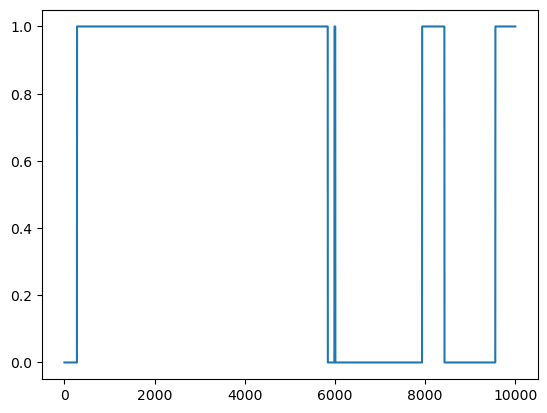

In [130]:
plt.plot(seq_to_coding['is_cds'].map({False:0, True:1})[0:10000])

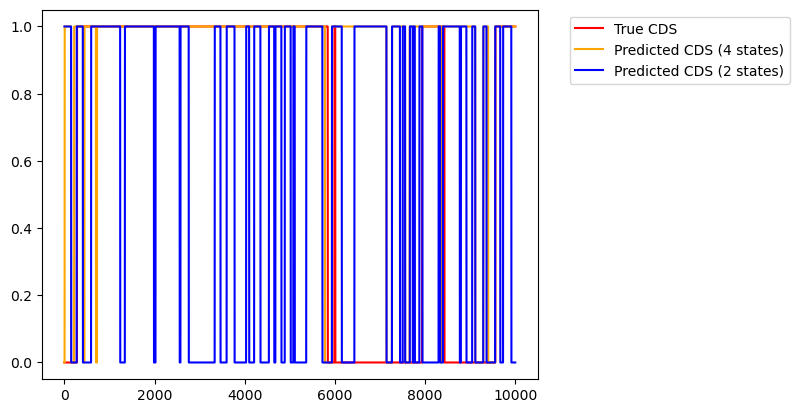

In [131]:
plt.plot(seq_to_coding['is_cds'].map({False:0, True:1})[0:10000],label='True CDS',color='red')
plt.plot(pd.Series(data_4['viterbi_path']).map({0:0,1:1,2:1,3:1})[0:10000],label='Predicted CDS (4 states)',color='orange')
plt.plot(pd.Series(data_2['viterbi_path']).map({0:0,1:1,2:1,3:1})[0:10000],label='Predicted CDS (2 states)',color='blue')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

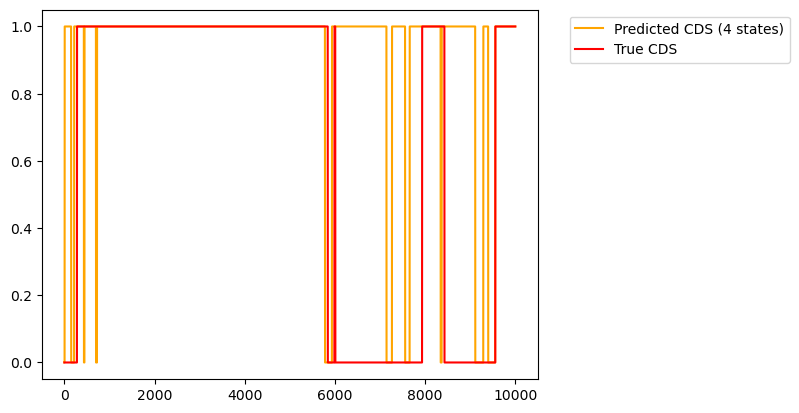

In [147]:
plt.plot(pd.Series(data_4['viterbi_path']).map({0:0,1:1,2:1,3:1})[0:10000],label='Predicted CDS (4 states)',color='orange')
plt.plot(seq_to_coding['is_cds'].map({False:0, True:1})[0:10000],label='True CDS',color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

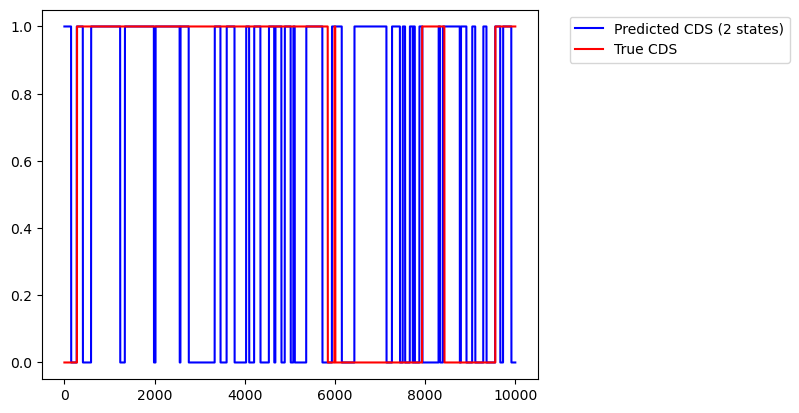

In [148]:
plt.plot(pd.Series(data_2['viterbi_path']).map({0:0,1:1,2:1,3:1})[0:10000],label='Predicted CDS (2 states)',color='blue')
plt.plot(seq_to_coding['is_cds'].map({False:0, True:1})[0:10000],label='True CDS',color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [275]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
y_true = seq_to_coding['is_cds'].map({False:0, True:1}).values
y_pred = pd.Series(data_4['viterbi_path']).map({0:0,1:1,2:1,3:1}).values
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# 2. Calculate Related Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary') # Use 'binary' for binary classification
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# 3. Comprehensive Classification Report (includes precision, recall, f1-score, support for each class)
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Non-coding', 'Coding']))

Confusion Matrix:
[[154128 753373]
 [  6211  34354]]

Metrics:
Accuracy: 0.20
Precision: 0.04
Recall: 0.85
F1-score: 0.08

Classification Report:
              precision    recall  f1-score   support

  Non-coding       0.96      0.17      0.29    907501
      Coding       0.04      0.85      0.08     40565

    accuracy                           0.20    948066
   macro avg       0.50      0.51      0.19    948066
weighted avg       0.92      0.20      0.28    948066



In [276]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
y_true = seq_to_coding['is_cds'].map({False:0, True:1}).values
y_pred = pd.Series(data_2['viterbi_path']).values
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# 2. Calculate Related Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary') # Use 'binary' for binary classification
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# 3. Comprehensive Classification Report (includes precision, recall, f1-score, support for each class)
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Non-coding', 'Coding']))

Confusion Matrix:
[[514306 393195]
 [ 23527  17038]]

Metrics:
Accuracy: 0.56
Precision: 0.04
Recall: 0.42
F1-score: 0.08

Classification Report:
              precision    recall  f1-score   support

  Non-coding       0.96      0.57      0.71    907501
      Coding       0.04      0.42      0.08     40565

    accuracy                           0.56    948066
   macro avg       0.50      0.49      0.39    948066
weighted avg       0.92      0.56      0.68    948066



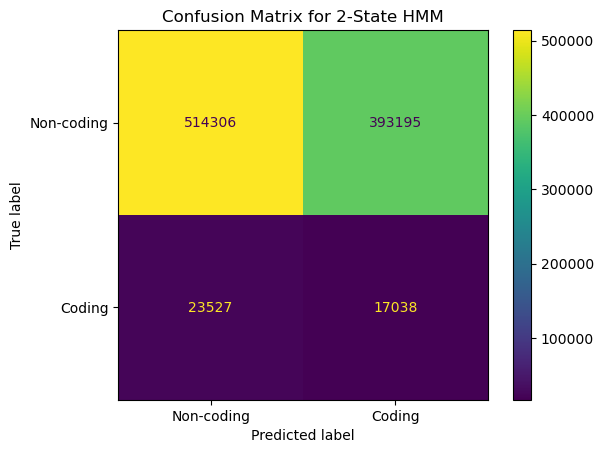

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = seq_to_coding['is_cds'].map({False:0, True:1}).values
predicted = pd.Series(data_2['viterbi_path']).map({0:0,1:1}).values

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non-coding', 'Coding'])

cm_display.plot()
plt.title('Confusion Matrix for 2-State HMM')
plt.show()
plt.savefig('/Users/samuelwright/Documents/CSE 250A/YeastCDSDetector-main/')

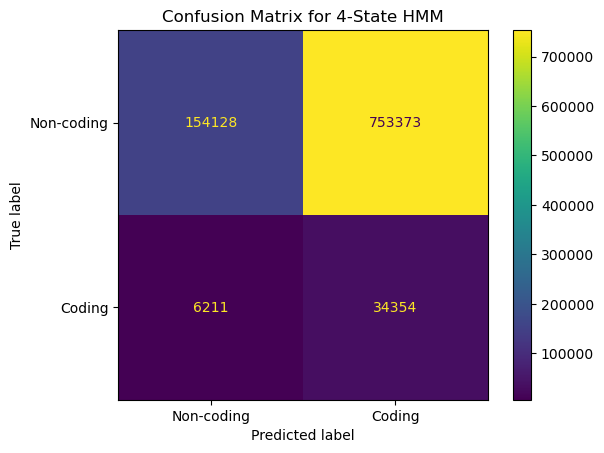

In [152]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = seq_to_coding['is_cds'].map({False:0, True:1}).values
predicted = pd.Series(data_4['viterbi_path']).map({0:0,1:1,2:1,3:1}).values

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non-coding', 'Coding'])

cm_display.plot()
plt.title('Confusion Matrix for 4-State HMM')
plt.show()

In [165]:
seq_to_coding['is_cds'][948065]

np.False_

In [247]:
transitions_gt = []
state_cn = pd.Series(seq_to_coding['is_cds']).map({False:0,True:1})
for i in seq_to_coding['is_cds'].index:
    if i==948065:
        break

    if state_cn[i] == 1:
        if state_cn[i+1] == 1:
            transitions_gt.append('C to C')
        else:
            transitions_gt.append('C to N')

    else:
        if state_cn[i+1] == 1:
            transitions_gt.append('N to C')
        else:
            transitions_gt.append('N to N')

In [248]:
len(transitions_gt)

948065

In [249]:
transitions_4state = []
state_cn = pd.Series(data_4['viterbi_path']).map({0:0,1:1,2:1,3:1})
for i in state_cn.index:
    if i==948065:
        break

    if state_cn[i] == 1:
        if state_cn[i+1] == 1:
            transitions_4state.append('C to C')
        else:
            transitions_4state.append('C to N')

    else:
        if state_cn[i+1] == 1:
            transitions_4state.append('N to C')
        else:
            transitions_4state.append('N to N')

In [250]:
transitions_2state = []
state_cn = pd.Series(data_2['viterbi_path']).map({0:0,1:1})
for i in state_cn.index:
    if i==948065:
        break

    if state_cn[i] == 1:
        if state_cn[i+1] == 1:
            transitions_2state.append('C to C')
        else:
            transitions_2state.append('C to N')

    else:
        if state_cn[i+1] == 1:
            transitions_2state.append('N to C')
        else:
            transitions_2state.append('N to N')

In [252]:
confusion_matrix

array([[ 16949,     78,     78,  23435],
       [    11,      0,      1,     13],
       [    11,      0,      0,     14],
       [391085,   2098,   2097, 512195]])

In [257]:
pd.Series(transitions_gt).value_counts()

N to N    907475
C to C     40540
N to C        25
C to N        25
Name: count, dtype: int64

In [255]:
pd.Series(transitions_4state).value_counts()

C to C    786695
N to N    159307
N to C      1032
C to N      1031
Name: count, dtype: int64

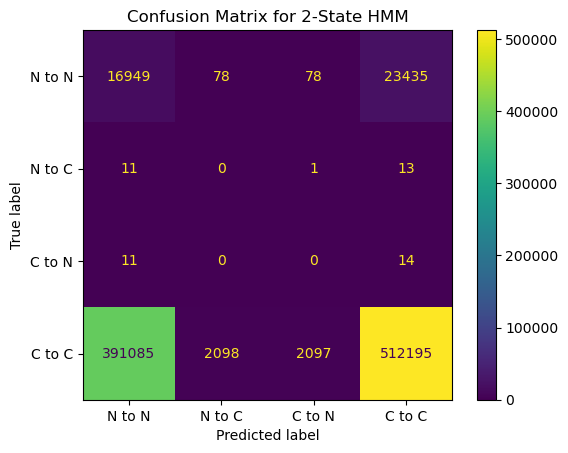

In [260]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = pd.Series(transitions_gt).values
predicted = pd.Series(transitions_2state).values

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['N to N', 'N to C', 'C to N', 'C to C'])

cm_display.plot()
plt.title('Confusion Matrix for 2-State HMM')
plt.show()

In [269]:
np.array(confusion_matrix).reshape(2,2)

array([[529144,   4351],
       [    49,      1]])

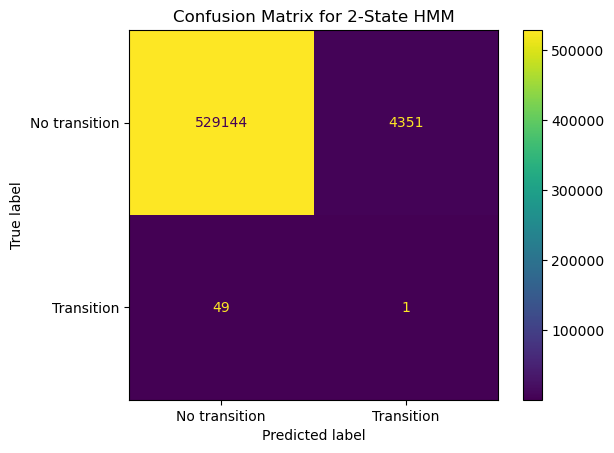

In [273]:
tn = 16949 + 512195
tp = 0 + 0 + 1 + 0
fp = 2098 + 2097 + 78 +78
fn = 11 + 11 + 13 + 14
confusion_matrix = [[tn,fp],[fn,tp]]
confusion_matrix = np.array(confusion_matrix).reshape(2,2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No transition','Transition'])

cm_display.plot()
plt.title('Confusion Matrix for 2-State HMM')
plt.show()

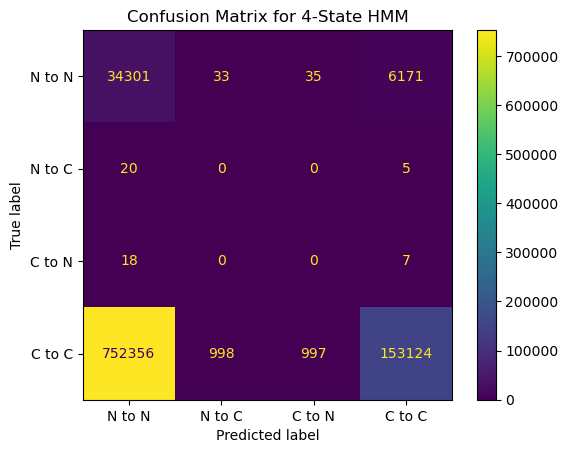

In [259]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = pd.Series(transitions_gt).values
predicted = pd.Series(transitions_4state).values

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['N to N', 'N to C', 'C to N', 'C to C'])

cm_display.plot()
plt.title('Confusion Matrix for 4-State HMM')
plt.show()

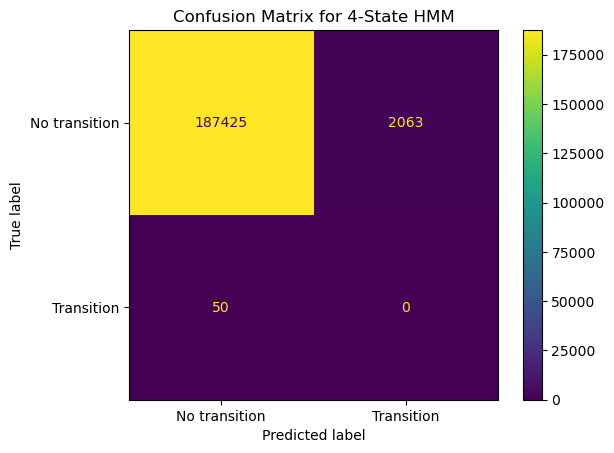

In [274]:
tn = 153124 + 34301
tp = 0 + 0 + 0 + 0
fp = 998 + 997 + 33 +35
fn = 20 + 18 + 5 + 7
confusion_matrix = [[tn,fp],[fn,tp]]
confusion_matrix = np.array(confusion_matrix).reshape(2,2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No transition','Transition'])

cm_display.plot()
plt.title('Confusion Matrix for 4-State HMM')
plt.show()